In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
import pandas as pd

symbols = ['AAPL', 'MSFT', 'KO', 'AMZN', 'DB', 'GLD']
noa = len(symbols)
data = pd.DataFrame()
for sym in symbols:
    data[sym] = yf.download(sym, start = '2020-01-01')['Close']
data.columns = symbols


/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[sym] = yf.download(sym, start = '2020-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/var/folders/f1/dgz0r8r50xs46bwbp23z_yjh0000gq/T/ipykernel_36088/2696888611.py:8: FutureWarning: YF.download() has changed argu

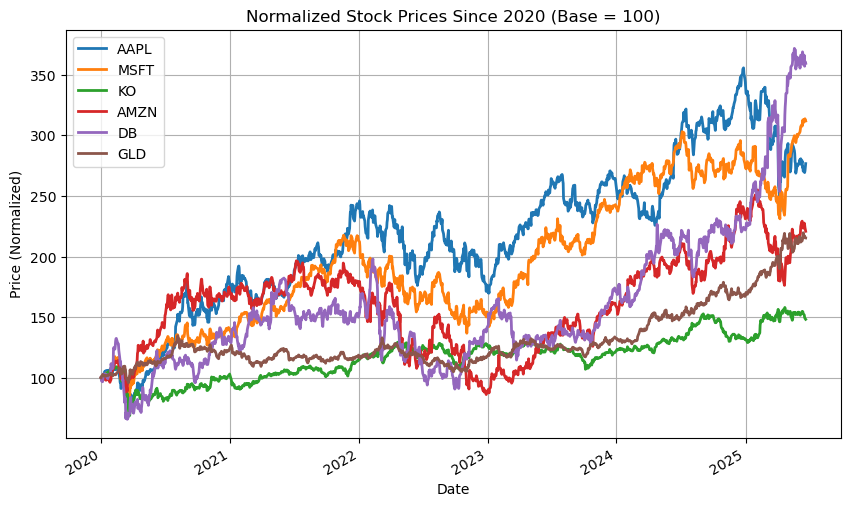

In [4]:
normed = data / data.iloc[0] * 100

# Plot
normed.plot(figsize=(10, 6), linewidth=2)
plt.title('Normalized Stock Prices Since 2020 (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Price (Normalized)')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
rets= np.log(data / data.shift(1))
rets.mean()*252

AAPL    0.186853
MSFT    0.208802
KO      0.072326
AMZN    0.145511
DB      0.234850
GLD     0.140871
dtype: float64

In [7]:
rets.cov()*252

,AAPL,MSFT,KO,AMZN,DB,GLD
AAPL,0.106283,0.072781,0.028070,0.071482,0.050114,0.005423
MSFT,0.072781,0.092788,0.024931,0.075506,0.045661,0.005053
KO,0.028070,0.024931,0.043398,0.014433,0.032901,0.004233
AMZN,0.071482,0.075506,0.014433,0.130764,0.044949,0.006516
DB,0.050114,0.045661,0.032901,0.044949,0.181315,0.004309
GLD,0.005423,0.005053,0.004233,0.006516,0.004309,0.025549


In [8]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.19890866, 0.03500037, 0.28920211, 0.14674659, 0.2655225 ,
       0.06461977])

In [9]:
np.sum(rets.mean()*weights)*252

0.15820595516396807

In [15]:
vet_arr = np.dot(weights.T, np.dot(rets.cov()*252, weights))
np.sqrt(vet_arr)

0.22330521765448905

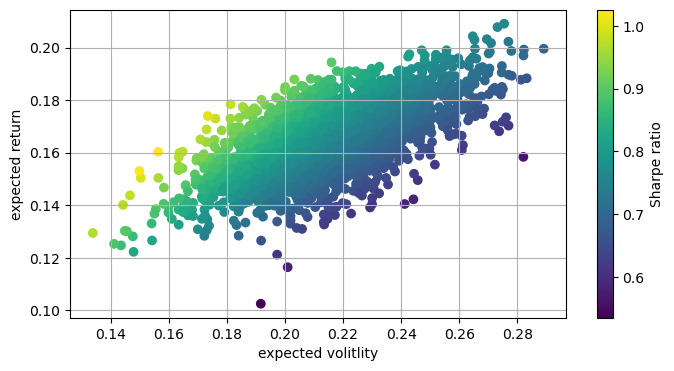

In [24]:
prets=[]
pvols = []
for _ in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    pret = np.sum(rets.mean() * weights) * 252
    prets.append(pret)
    cov_matrix = rets.cov() * 252
    port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    pvol = np.sqrt(port_var)
    pvols.append(pvol)
prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c = prets/ pvols, marker = 'o')
plt.grid(True)
plt.xlabel('expected volitlity')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')